케라스에서는 fit 함수를 이용해서 학습을 시키면 화면에 출력되는 수치들이 있습니다. 이러한 수치들은 학습이 제대로 되고 있는 지, 학습을 그만할 지 등 판단하는 중요한 척도가 됩니다. 에포크 마다 수치들이 바뀌며 변화 추이를 보는 것이 중요하기 때문에 그래프로 표시하여 보는 것이 더 직관적입니다. 본 절에서는 케라스에서 제공하는 기능을 이용하는 방법, 텐서보드를 통해서 보는 방법, 콜백함수를 직접 만들어서 사용하는 방법에 대해서 알아보겠습니다.

* 히스토리 기능 사용하기
* 텐서보드와 연동하기
* 직접 콜백함수 만들어보기

---

### 히스토리 기능 사용하기

케라스에서 학습시킬 때 fit 함수를 사용합니다. 이 함수의 반환 값으로 히스토리 객체를 얻을 수 있는데, 이 객체는 다음의 정보를 담고 있습니다. 
* 매 에포크 마다의 훈련 손실값 (loss) 
* 매 에포크 마다의 훈련 정확도 (acc)
* 매 에포크 마다의 검증 손실값 (val_loss)
* 매 에포크 마다의 검증 정확도 (val_acc)
히스토리 기능은 케라스의 모든 모델에 탑재되어 있으므로 별도의 설정없이 fit 함수의 반환으로 쉽게 얻을 수 있습니다. 사용법은 다음과 같습니다.

In [1]:
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

NameError: name 'model' is not defined

수치들은 각 에포크마다 해당 값이 추가되므로 배열 형태로 저장되어 있습니다. 이러한 수치들을 매 에포크마다 변화되는 추이를 그래프로 표시하여 비교하면서 보면 학습 상태를 직관적으로 이해하기 쉽습니다. 아래 코드와 같이 matplotlib 패키지를 이용하면 하나의 그래프로 쉽게 표시할 수 있습니다. 

NameError: name 'hist' is not defined

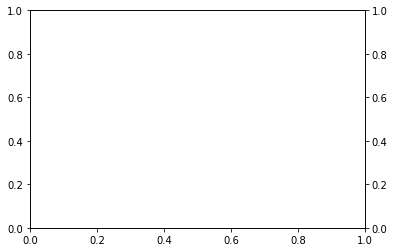

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

전체 코드는 다음과 같습니다.

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s - loss: 2.3067 - acc: 0.1171 - val_loss: 2.2751 - val_acc: 0.0933
Epoch 2/1000
700/700 [==============================] - 0s - loss: 2.2731 - acc: 0.1257 - val_loss: 2.2508 - val_acc: 0.1267
Epoch 3/1000
700/700 [==============================] - 0s - loss: 2.2479 - acc: 0.1343 - val_loss: 2.2230 - val_acc: 0.1267
Epoch 4/1000
700/700 [==============================] - 0s - loss: 2.2220 - acc: 0.1471 - val_loss: 2.1984 - val_acc: 0.1233
Epoch 5/1000
700/700 [==============================] - 0s - loss: 2.1957 - acc: 0.1400 - val_loss: 2.1724 - val_acc: 0.1233
Epoch 6/1000
700/700 [==============================] - 0s - loss: 2.1685 - acc: 0.1457 - val_loss: 2.1513 - val_acc: 0.1133
Epoch 7/1000
700/700 [==============================] - 0s - loss: 2.1424 - acc: 0.1757 - val_loss: 2.1276 - val_acc: 0.1533
Epoch 8/1000
700/700 [==============================] - 0s - loss: 2.1174 - acc

Using Theano backend.


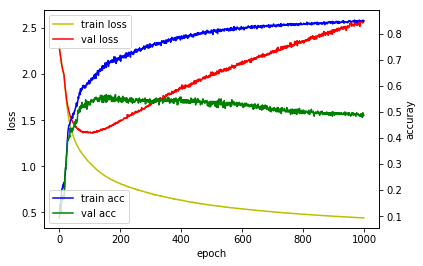

In [3]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

---

### 텐서보드와 연동하기

아래 코드는 MNIST 데이터셋(손글씨)을 이용하여 숫자를 분류하는 문제를 간단한 다층퍼셉트론 모델을 구성한 후 학습 시킨 후 판정하는 코드입니다.

---

### 직접 콜백함수 만들어보기

아래 코드는 MNIST 데이터셋(손글씨)을 이용하여 숫자를 분류하는 문제를 간단한 다층퍼셉트론 모델을 구성한 후 학습 시킨 후 판정하는 코드입니다.

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0

train_rand_idxs = np.random.choice(60000, 200)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]

X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

test_rand_idxs = np.random.choice(10000, 1000)
X_test = X_test[test_rand_idxs]
Y_test = Y_test[test_rand_idxs]

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=5000, batch_size=5, validation_data=(X_test, Y_test))

# 5. 모델 사용하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

Train on 200 samples, validate on 1000 samples
Epoch 1/5000
200/200 [==============================] - 0s - loss: 2.2984 - acc: 0.1600 - val_loss: 2.2868 - val_acc: 0.1290
Epoch 2/5000
200/200 [==============================] - 0s - loss: 2.2764 - acc: 0.1800 - val_loss: 2.2672 - val_acc: 0.1290
Epoch 3/5000
200/200 [==============================] - 0s - loss: 2.2533 - acc: 0.1500 - val_loss: 2.2507 - val_acc: 0.1320
Epoch 4/5000
200/200 [==============================] - 0s - loss: 2.2315 - acc: 0.1550 - val_loss: 2.2323 - val_acc: 0.1340
Epoch 5/5000
200/200 [==============================] - 0s - loss: 2.2062 - acc: 0.2100 - val_loss: 2.2114 - val_acc: 0.1820
Epoch 6/5000
200/200 [==============================] - 0s - loss: 2.1718 - acc: 0.2250 - val_loss: 2.1829 - val_acc: 0.1940
Epoch 7/5000
200/200 [==============================] - 0s - loss: 2.1256 - acc: 0.2400 - val_loss: 2.1513 - val_acc: 0.2110
Epoch 8/5000
200/200 [==============================] - 0s - loss: 2.0913 - ac

In [ ]:
# 학습 과정 표시하기

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'g', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g--', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'b--', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss', color='g')
acc_ax.set_ylabel('accuray', color='b')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


이 코드에서 '4. 모델 학습시키기'까지가 학습을 하기 위한 과정이고, '5. 모델 사용하기'이후 코드가 학습된 모델을 사용하는 부분입니다. 이 사이를 분리하여 별도의 모듈로 만들면 우리가 원하는 결과를 얻을 수 있습니다.

---

### 실무에서의 딥러닝 시스템

모듈을 분리하기 전에 실무에서의 딥러닝 시스템을 살펴보겠습니다. 도메인, 문제에 마다 다양한 구성이 있겠지만, 제가 생각하는 딥러닝 시스템 구성은 다음과 같습니다.

![data](http://tykimos.github.com/Keras/warehouse/2017-6-10-Model_Load_Save_1.png)

우리가 만들고자 하는 전체 시스템을 목표 시스템이라고 했을 때, 크게 '학습 segment'와 '판정 segment'로 나누어집니다. '학습 segment'는 학습을 위해, 학습 데이터를 얻기 위한 '학습용 센싱 element', 센싱 데이터에서 학습에 적합한 형태로 전처리를 수행하는 '데이터셋 생성 element', 그리고 데이터셋으로 딥러닝 모델을 학습시키는 '딥러닝 모델 학습 element'으로 나누어집니다. '판정 segment'는 실무 환경에서 수집되는 센서인 '판정용 센싱 element'과 학습된 딥러닝 모델을 이용해서 센싱 데이터를 판정하는 '딥러닝 모델 판정 element'으로 나누어집니다. 앞서 본 코드에는 `딥러닝 모델 학습 element`와 `딥러닝 모델 판정 element`가 모두 포함되어 있습니다. 이 두가지 element를 분리해보겠습니다. 

    딥러닝 시스템은 크게 학습 부분과 판정 부분으로 나누어진다.

---

### 학습된 모델 저장하기

아래 코드는 훈련데이터셋으로 모델을 학습시킨 후, 학습된 모델을 파일로 저장하는 코드입니다. 바뀐 부분은 다음과 같습니다.
- X_test, Y_test가 필요 없습니다.
- 모델을 저장하기 위한 코드를 추가합니다. (아래 코드에서 5번 주석 확인)

In [ ]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

In [ ]:


from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 1. 데이터셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
# X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
# Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(X_train, Y_train, epochs=5, batch_size=32)

# 5. 모델 저장하기
from keras.models import load_model
model.save('mnist_mlp_model.h5')

'mnist_mlp_model.h5'라는 파일이 작업 디렉토리에 생성되었는 지 확인해봅니다. 예제에서는 424KB로 생성되었습니다. 저장된 파일에는 다음의 정보가 담겨 있습니다.

- 나중에 모델을 재구성하기 위한 모델의 구성 정보
- 모델를 구성하는 각 뉴런들의 가중치
- 손실함수, 최적하기 등의 학습 설정
- 재학습을 할 수 있도록 마지막 학습 상태

---

### 학습된 모델 불러오기

'mnist_mlp_model.h5'에 학습된 결과가 저장되어 있으니, 이를 불러와서 사용해봅니다. 코드 흐름은 다음과 같습니다.
- X_test, Y_test 데이터셋 준비합니다. 실무에서는 실제로 들어오는 데이터를 사용하시면 됩니다.
- 모델 불러오는 함수를 이용하여 앞서 저장한 모델 파일로부터 모델을 재형성합니다.
- 실제 데이터로 모델을 사용합니다. 예제에서는 정상적으로 모델을 불러왔는 지 확인하기 위해 evaluate() 함수를 사용했지만, 실무에서 입력 데이터에 대한 모델 출력 결과를 얻어야 하므로 predict() 함수를 사용합니다.

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 1. 데이터셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
# Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 불러오기
from keras.models import load_model

model = load_model('mnist_mlp_model.h5')

# 3. 모델 사용하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

정상적으로 학습된 모델을 불러와서, 분리하기 전 코드에서의 모델과 유사한 결과를 얻었음을 알 수 있습니다.

---

### 결론

본 강좌에서는 학습한 모델을 저장하고 불러오는 방법에 대해서 알아보았습니다. 저장된 파일에는 모델 구성 및 가중치 정보외에도 학습 설정 및 상태가 저장되므로 모델을 불러온 후 재 학습을 시킬 수 있습니다. 일반적인 딥러닝 시스템에서는 학습 처리 시간을 단축시키기 위해 GPU나 클러스터 장비에서 학습 과정이 이루어지나, 판정 과정은 학습된 모델 결과 파일을 이용하여 일반 PC 및 모바일, 임베디드 등에서 이루어집니다. 도메인, 사용 목적 등에 따라 이러한 환경이 다양하기 때문에, 딥러닝 모델에 대한 연구도 중요하지만, 실무에 적용하기 위해서는 목표 시스템에 대한 설계도 중요합니다.

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)